In [490]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [491]:
# %run ./func.ipynb
# %run ./func_v2.ipynb
# %run ./func_v3.ipynb
# %run ./func_v3-1.ipynb
# %run ./func_v3-2.ipynb
%run ./func_v4_1.ipynb

In [492]:
D, J = 30,30

# a side of the grid
num_rows_columns = 50
demand_points, candidate_sites = generate_instance(num_rows_columns, D, J, seed=42)

print("Demand Points:")
print(demand_points)

print("\nCandidate Sites:")
print(candidate_sites)

Demand Points:
[(36, 18), (9, 18), (44, 10), (46, 8), (25, 24), (22, 16), (35, 49), (11, 35), (29, 36), (42, 45), (24, 1), (31, 12), (43, 9), (39, 22), (26, 33), (4, 34), (22, 3), (11, 38), (12, 34), (33, 25), (11, 5), (35, 36), (9, 16), (48, 10), (50, 22), (49, 35), (30, 35), (19, 49), (17, 38), (29, 42)]

Candidate Sites:
[(39, 48), (1, 1), (36, 4), (12, 50), (47, 22), (17, 22), (11, 19), (48, 31), (48, 23), (38, 20), (36, 24), (47, 7), (1, 4), (16, 43), (2, 25), (32, 20), (9, 42), (43, 17), (26, 50), (6, 25), (38, 40), (46, 21), (14, 40), (7, 46), (22, 26), (5, 37), (41, 46), (27, 19), (41, 6), (42, 22)]


In [493]:
alpha = 0
beta = 0.1

p = 3
r = 2

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}


In [494]:
distances = compute_distances(demand_points, candidate_sites)
print("\nDistances:", distances)

# w_ij の計算
wij_matrix = compute_wij_matrix(distances, alpha, beta)
print("\nw_ij Matrix:", wij_matrix)

# U_i^L の計算
Ui_L = compute_Ui_L(wij_matrix, J_L)
print("\nU_i^L:", Ui_L)

# U_i^F の計算
Ui_F = compute_Ui_F(wij_matrix, J_F)
print("\nU_i^F:", Ui_F)


Distances: [[30.14962686 38.91015292 14.         40.         11.70469991 19.41648784
  25.01999201 17.69180601 13.          2.82842712  6.         15.55634919
  37.69615365 32.01562119 34.71310992  4.47213595 36.12478374  7.07106781
  33.52610923 30.8058436  22.09072203 10.44030651 31.11269837 40.31128874
  16.1245155  36.35931793 28.44292531  9.05538514 13.          7.21110255]
 [42.42640687 18.78829423 30.41381265 32.14031736 38.20994635  8.94427191
   2.23606798 41.10960958 39.3192065  29.06888371 27.65863337 39.56008089
  16.1245155  25.96150997  9.89949494 23.08679276 24.         34.0147027
  36.23534186  7.61577311 36.40054945 37.12142239 22.56102835 28.0713377
  15.26433752 19.41648784 42.52058325 18.02775638 34.17601498 33.24154028]
 [38.32753579 43.93176527 10.         51.2249939  12.36931688 29.54657341
  34.20526275 21.37755833 13.60147051 11.66190379 16.1245155   4.24264069
  43.41658669 43.27817002 44.59820624 15.62049935 47.42362281  7.07106781
  43.8634244  40.85339643 

In [495]:
x0 = np.random.rand(len(candidate_sites))  # 例: 初期値
y0 = np.random.rand(len(candidate_sites))  # 同じ次元

In [496]:
final_x, final_y, hist_obj, hist_dx, hist_dy = minmax_solver(x0, y0, wij_matrix, Ui_L, Ui_F, h_i, p, r)


🌸🌸🌸  Iteration 1  🌸🌸🌸
🔧  After rounding:
     ➤ x (rounded): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
     ➤ x ( binbin): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
     ➤ y (rounded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
     ➤ y ( binbin): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
📈  Objective L̂(x, y) = 0.618171
🔍  dx = 3.25e+00, dy = 3.41e+00

🌸🌸🌸  Iteration 2  🌸🌸🌸
🔧  After rounding:
     ➤ x (rounded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0.]
     ➤ x ( binbin): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0.]
     ➤ y (rounded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0.]
     ➤ y ( binbin): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [497]:
print("\nFinal x values:" ,final_x)
print("\nFinal y values:" ,final_y)
print("\nhistory of objrct:" ,hist_obj)


Final x values: [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.03062036e-17
 0.00000000e+00 0.00000000e+00 3.70598549e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.50348950e-01 2.05025566e-01
 0.00000000e+00 5.85656268e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.60714358e-18 0.00000000e+00 2.07962996e-17
 3.61147618e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.35532396e-17 0.00000000e+00 7.27223049e-01
 0.00000000e+00 0.00000000e+00]

Final y values: [0.00000000e+00 1.24479602e-17 1.62136458e-16 9.78617517e-17
 2.55032043e-17 1.11133864e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.05822538e-01 0.00000000e+00 2.78430160e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.52719733e-01
 0.00000000e+00 0.00000000e+00 5.78950488e-17 0.00000000e+00
 4.23602898e-18 0.00000000e+00 2.12278830e-01 1.14959913e-17
 8.68236429e-01 0.00000000e+00 6.09424698e-02 0.00000000e+00
 5.29417004e-17 3.09603596e-16]

history of objrct: [0.6181705797421245, 0.57905

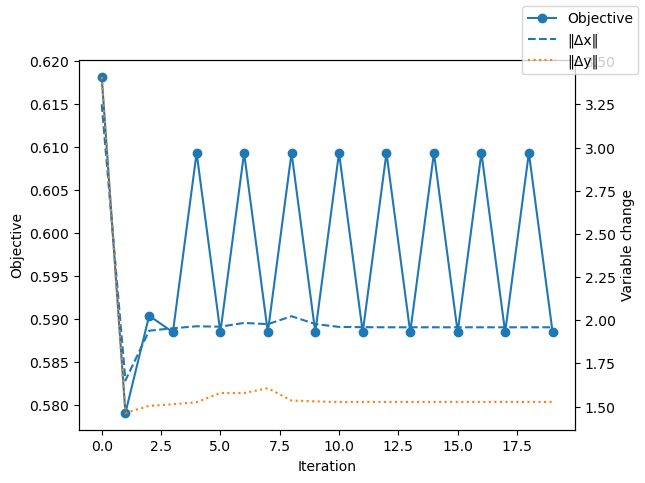

In [498]:
fig, ax1 = plt.subplots()
ax1.plot(hist_obj, label='Objective', marker='o')
ax2 = ax1.twinx()
ax2.plot(hist_dx,  label='‖Δx‖',  ls='--')
ax2.plot(hist_dy,  label='‖Δy‖',  ls=':')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax2.set_ylabel('Variable change')
fig.legend(loc='upper right')
plt.show()